In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMAZON
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMAZON
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500,AMAZON
2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600,AMAZON
2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300,AMAZON
2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMAZON
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON


Step 2 - Descriptive Statistics about the Data

.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [13]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,140.686786,142.273333,139.237540,140.832460,140.832460,5.255327e+07
std,21.422244,21.458113,21.413781,21.509826,21.509826,1.944170e+07
min,98.949997,100.510002,97.709999,97.830002,97.830002,2.237840e+07
25%,127.732498,129.010002,125.639999,127.637499,127.637499,4.175810e+07
50%,137.564995,138.824997,135.690002,137.760002,137.760002,4.848415e+07
75%,153.559998,154.797501,152.695004,153.557499,153.557499,5.881808e+07
max,187.240005,187.339996,184.809998,185.949997,185.949997,1.529387e+08


In [14]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.871310,182.309405,179.537579,180.997222,180.562264,5.728326e+07
std,9.132599,9.010971,9.057245,9.048514,9.083147,1.726933e+07
min,161.220001,162.059998,159.779999,160.100006,159.250000,2.404830e+07
25%,173.110004,174.307499,171.874996,173.544998,172.997765,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.343105e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [15]:
# .info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-11 to 2024-04-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


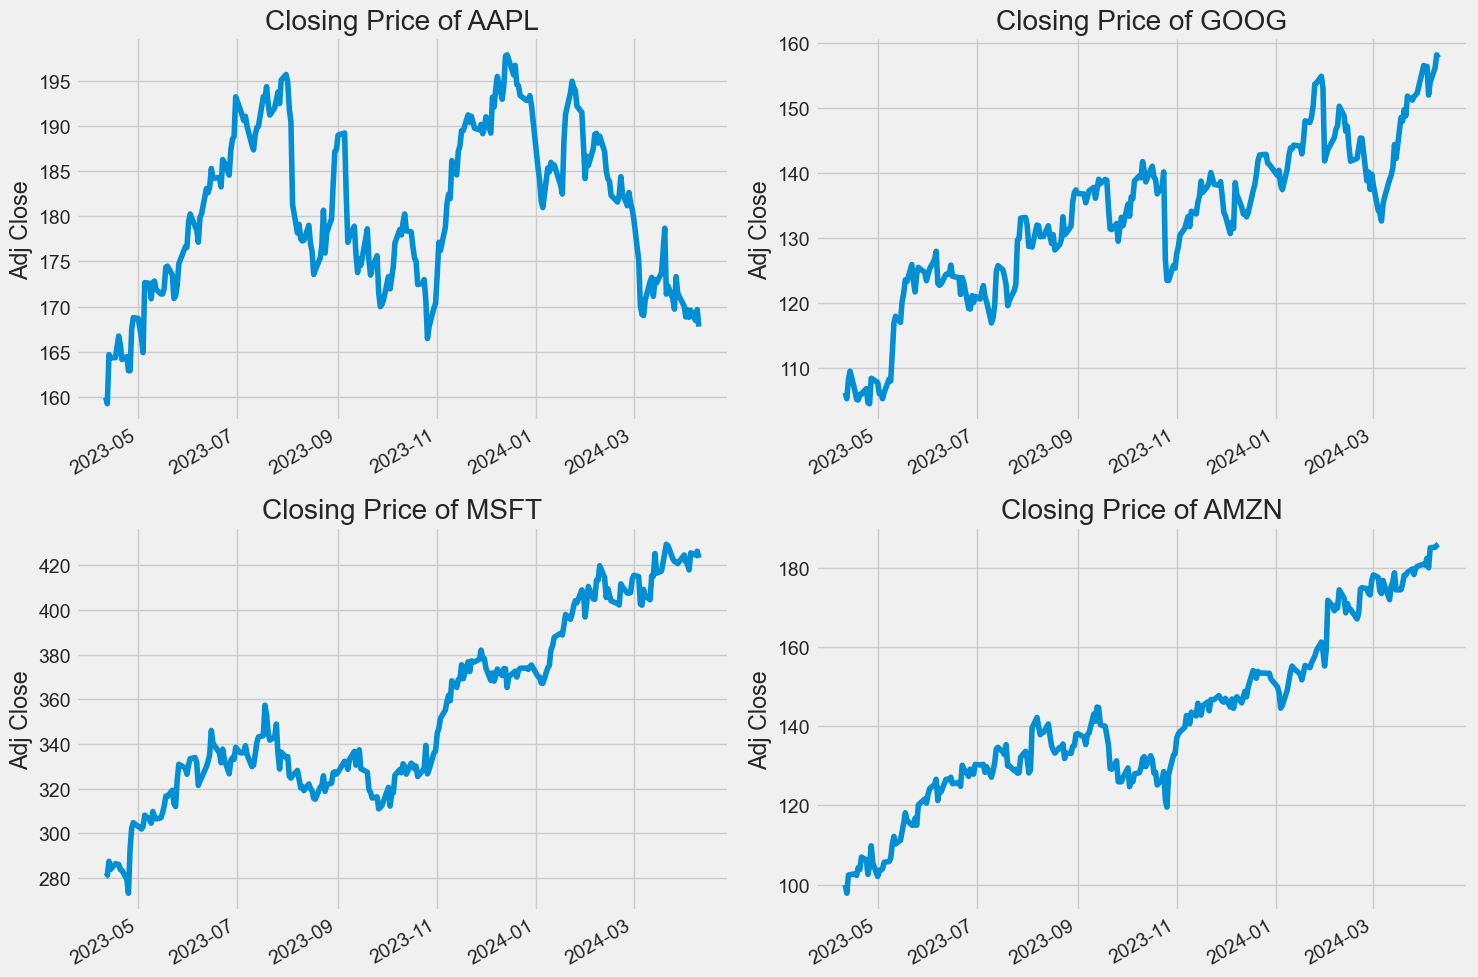

In [16]:
#The closing price is the last price for which the stock is traded during the regular trading day. 
#Investors use the closing price as a bench mark to track the stocks performance.
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

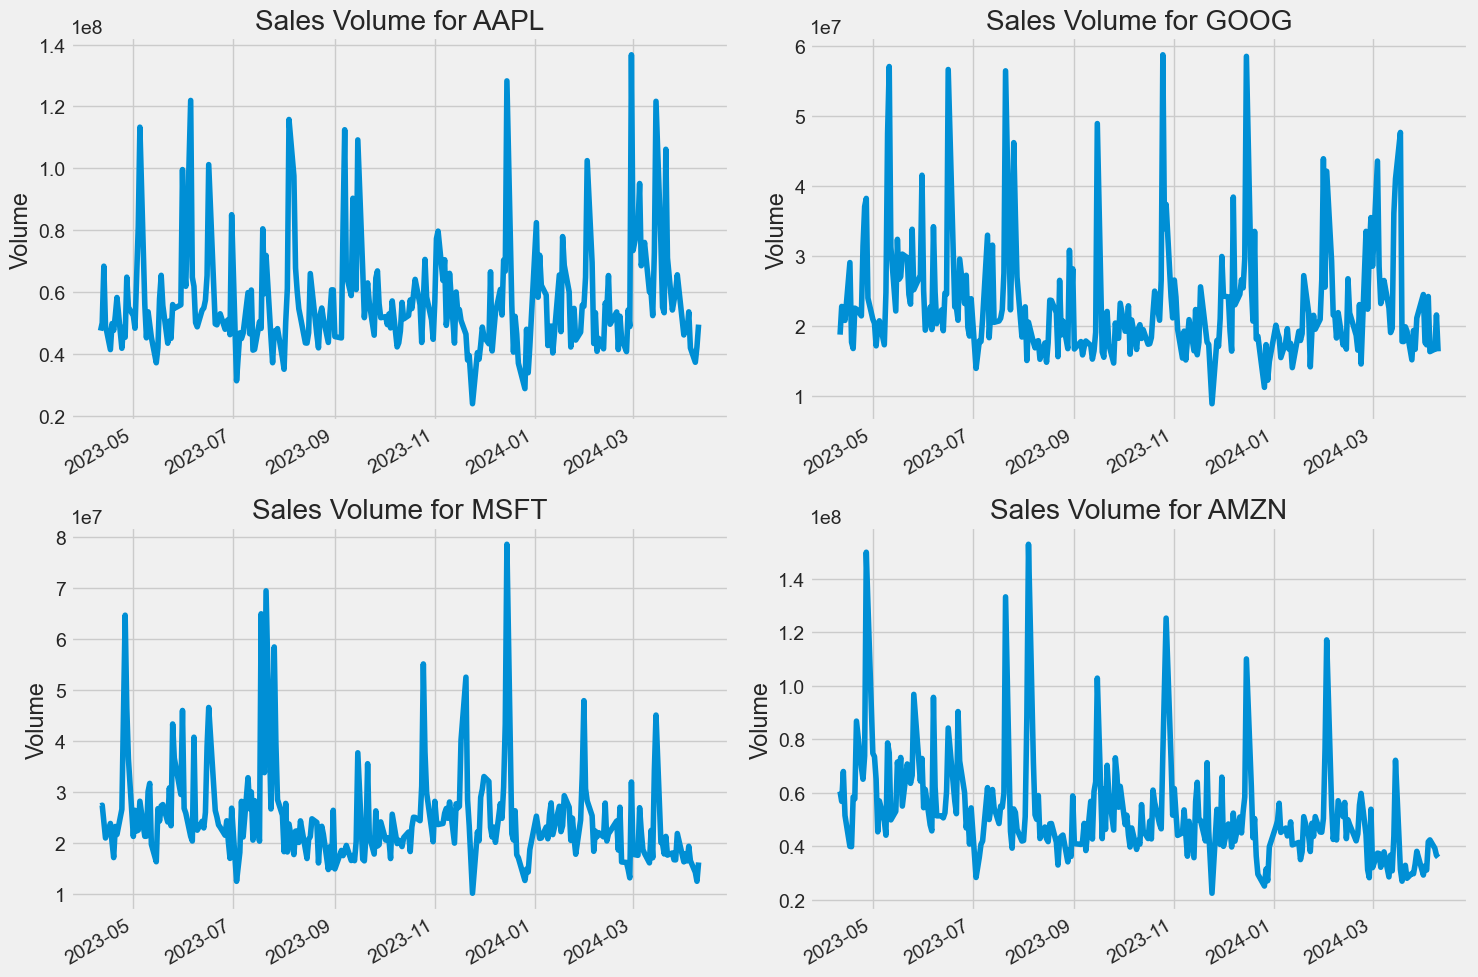

In [17]:
# Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. 
#For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close.
#Trading volume, and changes to volume over the course of time, are important inputs for technical traders.
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

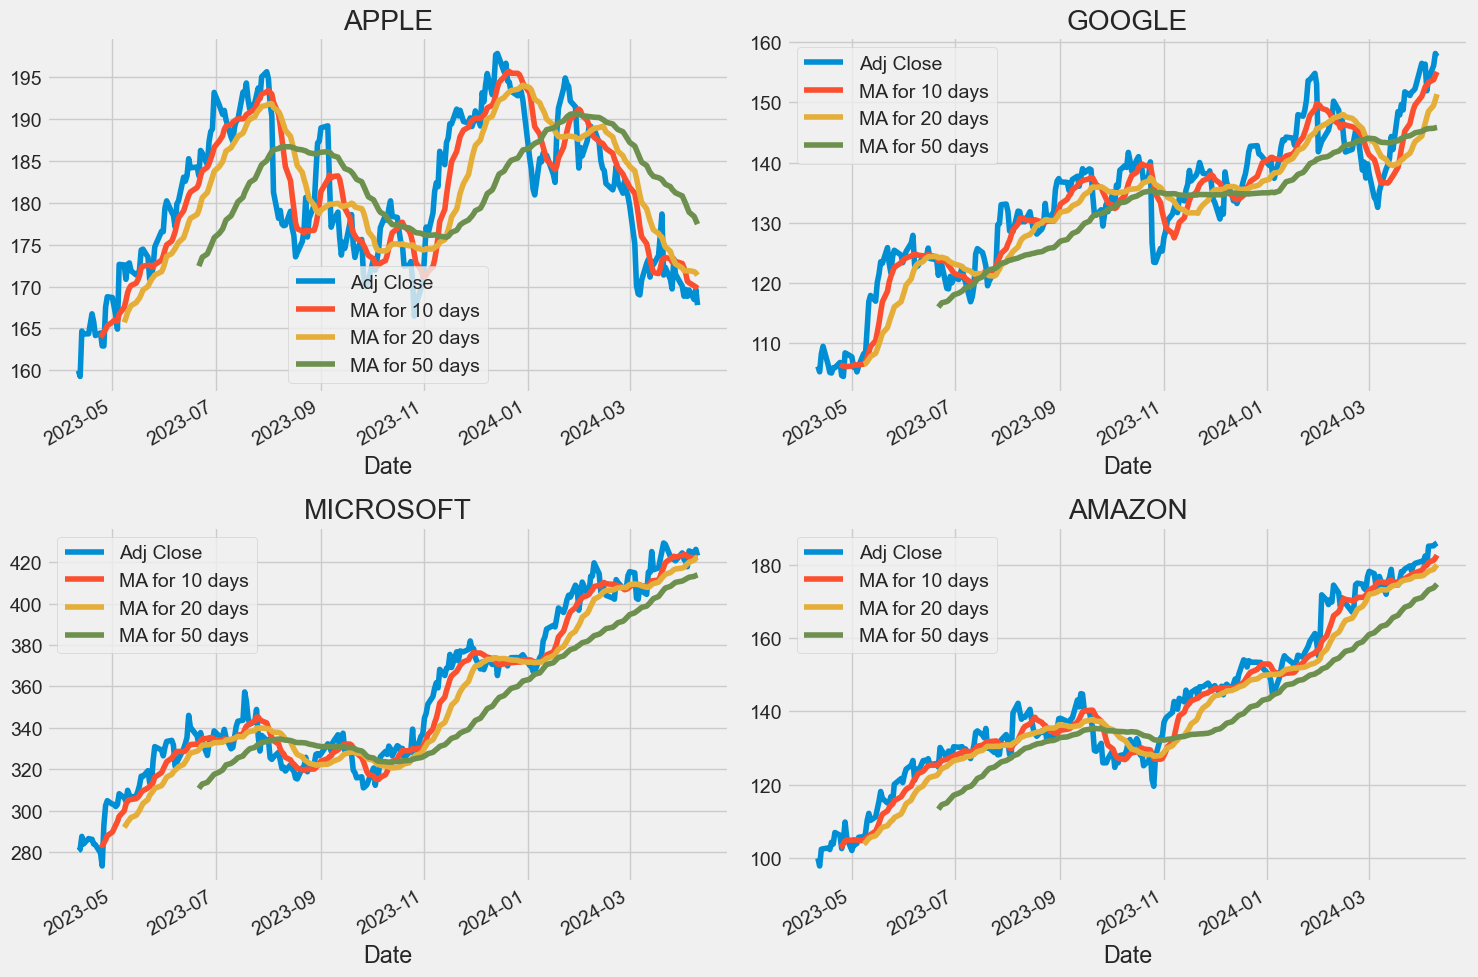

In [18]:
#The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.
#The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise

3. Analyzing the daily return of the stock on average.
We are now going to analyze the risk of the stock, by taking a closer look at the daily changes of the stock in percentage.


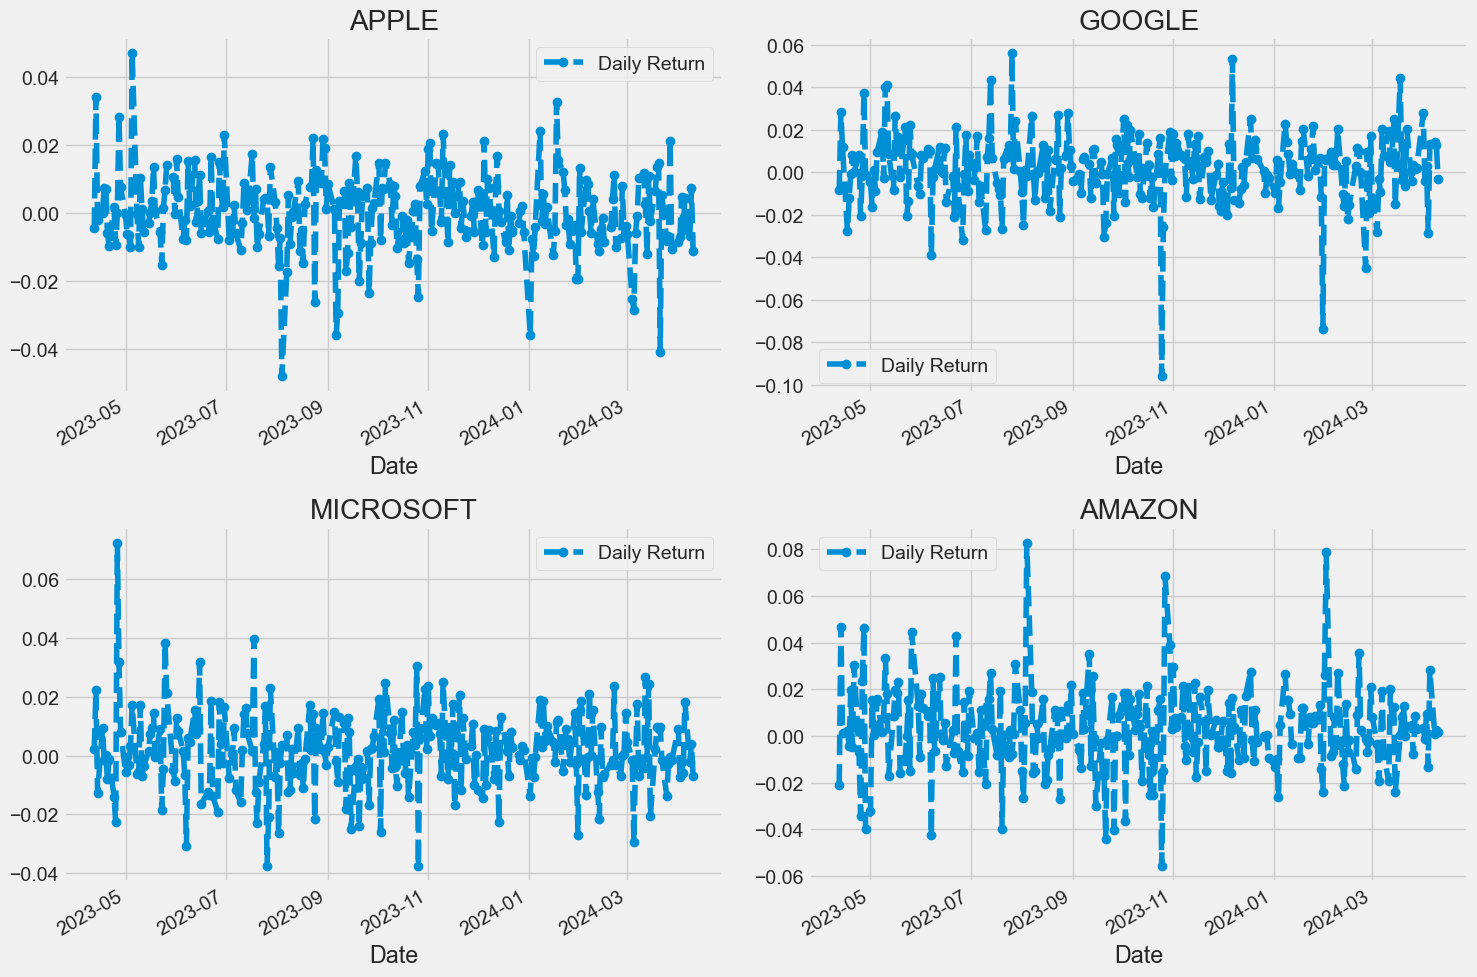

In [19]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

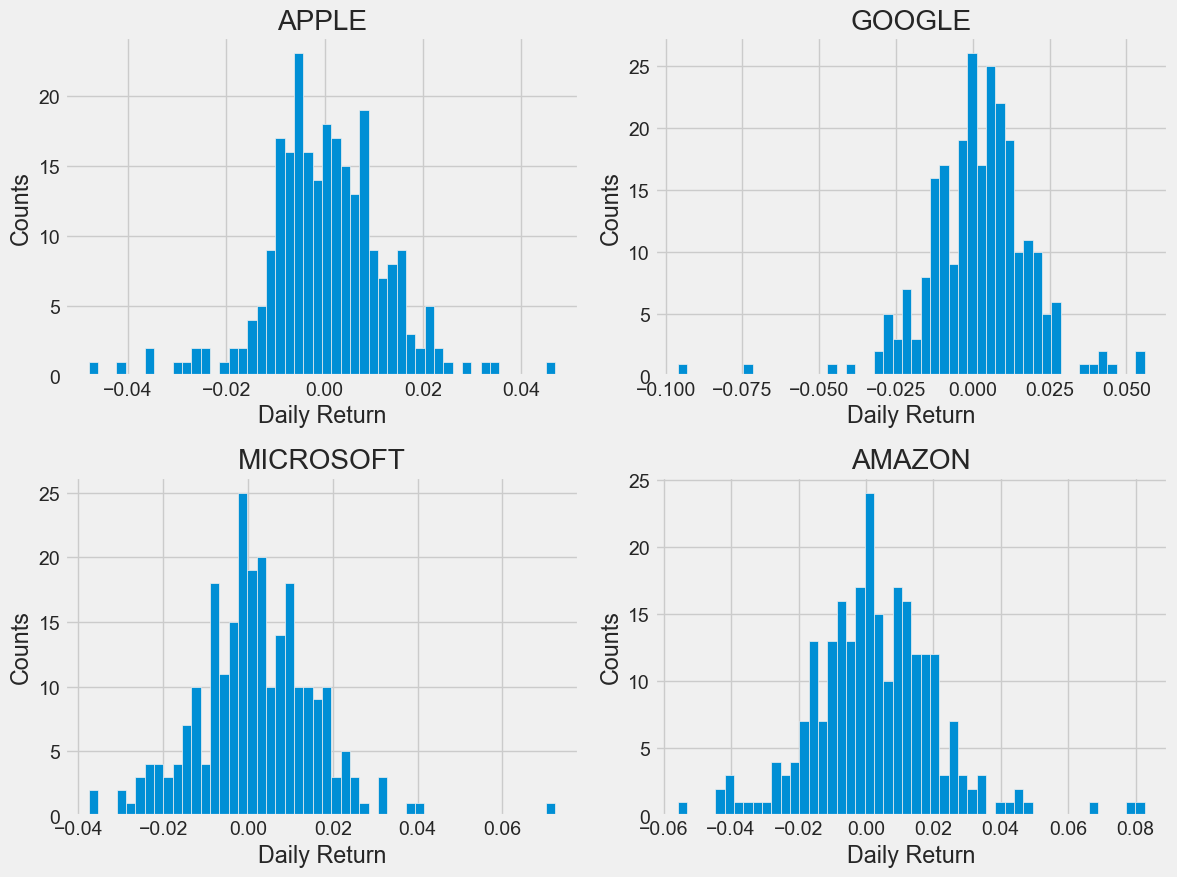

In [21]:
# let's get an overall look at the average daily return using a histogram. 
#We'll use seaborn to create both a histogram and kde plot on the same figure.
plt.figure(figsize = (12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

4. **Analyzing the correlation between the tech stocks
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [22]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-11,NaN,NaN,NaN,NaN
2023-04-12,-0.004353,-0.020917,-0.008481,0.002333
2023-04-13,0.034103,0.046714,0.028227,0.022399
2023-04-14,-0.002114,0.001074,0.011739,-0.012766
2023-04-17,0.000121,0.002244,-0.027773,0.009296


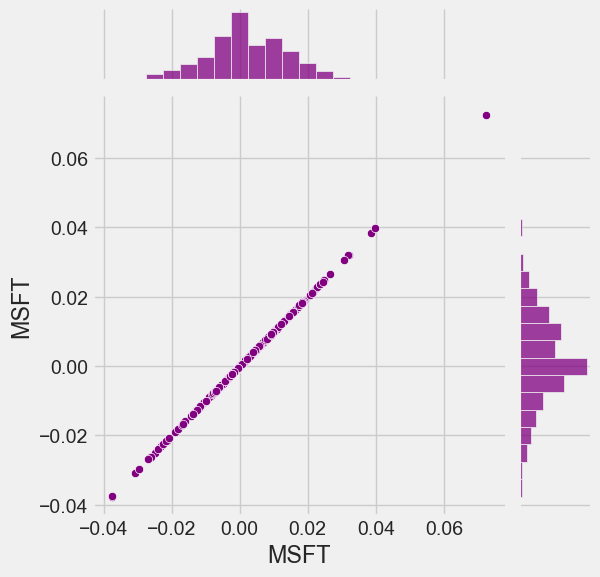

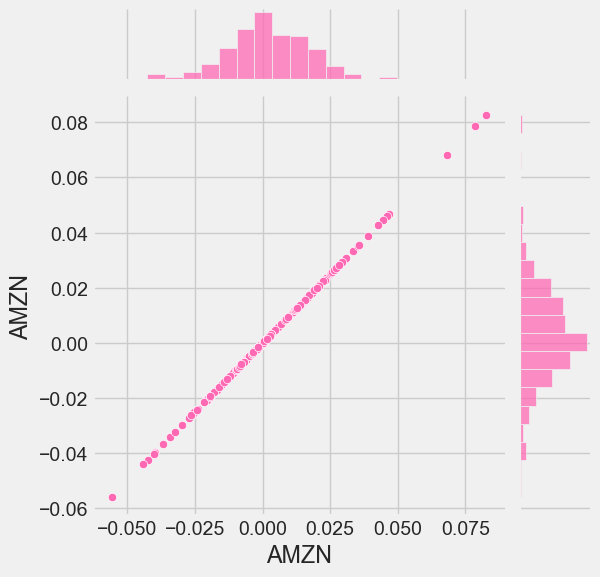

In [27]:
# A correlation of Microsoft to itself and Amazon to itself should show a perfectly linear relationship
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='purple')
sns.jointplot(x= 'AMZN', y = 'AMZN', data=tech_rets, kind='scatter', color='hotpink')